In [111]:
import pandas as pd
import seaborn as sns
import contractions
from wordcloud import STOPWORDS

# Seth Godin's Blog Dataset - EDA

In [112]:
dataset = pd.read_csv('../data/seth-data.csv')

dataset.head()

,Unnamed: 0,id,url,title,content_plain,content_html,stars,publication-date,referral-url
0,0,24220,https://seths.blog/2002/01/free_signed_cop/,Free Signed Copy of SURVIVAL IS NOT ENOUGH,Don’t know if you read the column I wrote abo...,Don’t know if you read the column I wrote abo...,104,"January 17, 2002",https://seths.blog/page/742/
1,1,24221,https://seths.blog/2002/01/free_ebook_buy_/,Free eBook,Buy a copy of the new paperback edition of Th...,Buy a copy of the new paperback edition of Th...,145,NaN,https://seths.blog/page/742/
2,2,24222,https://seths.blog/2002/01/free_quiz_find_/,Free Quiz,Find out if you zoom. My friend Red did an am...,Find out if you zoom. My friend Red did an am...,112,NaN,https://seths.blog/page/742/
3,3,24223,https://seths.blog/2002/01/thanks_survival/,Thanks,Survival is Not Enough. hit #4 on the Denver ...,Survival is Not Enough. hit #4 on the Denver ...,140,NaN,https://seths.blog/page/742/
4,4,24224,https://seths.blog/2002/01/boring_i_was_st/,Boring,I was stranded today. I had to spend hours in ...,I was stranded today. I had to spend hours in ...,618,"January 15, 2002",https://seths.blog/page/742/


In [113]:
dataset = dataset[dataset['content_plain'].notna()]

dataset = dataset[['content_plain']]

## Data Cleaning

In [114]:
contractions.add("we'll", 'we will')

In [115]:
dataset['content_plain'] = dataset['content_plain'].str.lower()
dataset['content_plain'] = dataset['content_plain'].str.replace("'s ", " ")
dataset['content_plain'] = dataset['content_plain'].str.replace("'s\.", ".")
dataset['content_plain'] = dataset['content_plain'].str.replace("'s,", ',')
dataset['content_plain'] = dataset['content_plain'].str.replace("'s:", ':')

#dataset['content_plain'] = dataset['content_plain'].str.replace("'s)", ")")
dataset['content_plain'] = dataset['content_plain'].str.replace('’', "'")

dataset['content_plain'] = dataset['content_plain'].apply(lambda post: contractions.fix(post))

dataset['content_plain'] = dataset['content_plain'].str.replace("n't", 'nt')
dataset['content_plain'] = dataset['content_plain'].str.replace("'", ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace('‘', " ")
dataset['content_plain'] = dataset['content_plain'].str.replace('“', ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace('”', ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace('"', ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace('\.\.\.', '.')
dataset['content_plain'] = dataset['content_plain'].str.replace('\.\.', '.')
dataset['content_plain'] = dataset['content_plain'].str.replace('…', '.')
dataset['content_plain'] = dataset['content_plain'].str.replace('—', '-')
dataset['content_plain'] = dataset['content_plain'].str.replace('-', ' - ')
dataset['content_plain'] = dataset['content_plain'].str.replace('–', ' - ')
dataset['content_plain'] = dataset['content_plain'].str.replace("™", ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace("\xa0", ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace("\xa02", ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace(" s ", "")

/var/folders/s1/ts3nxvl965lfts126qzdcw300000gn/T/ipykernel_49358/3504906383.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['content_plain'] = dataset['content_plain'].str.replace("'s\.", ".")
/var/folders/s1/ts3nxvl965lfts126qzdcw300000gn/T/ipykernel_49358/3504906383.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['content_plain'] = dataset['content_plain'].str.replace('\.\.\.', '.')
/var/folders/s1/ts3nxvl965lfts126qzdcw300000gn/T/ipykernel_49358/3504906383.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['content_plain'] = dataset['content_plain'].str.replace('\.\.', '.')


In [116]:
dataset.head(20)

,content_plain
0,do not know if you read the column i wrote ab...
1,buy a copy of the new paperback edition of th...
2,find out if you zoom. my friend red did an am...
3,survival is not enough. hit #4 on the denver ...
4,i was stranded today. i had to spend hours in ...
5,working out at the awful marriott outside of t...
6,googlesecret hope it is still live by the tim...
7,"so there it is, in the fine print at the botto..."
8,"lately, the entertainment mega - companies app..."
9,"the editors at inside.com (now, alas, basicall..."


In [117]:
# filter out posts that contains websites, URLs, emails, etc

## Text Statistical Analysis

In [118]:
dataset['word_count'] = dataset['content_plain'].apply(lambda x: len(str(x).split()))

In [119]:
dataset = dataset[dataset['word_count'] >= 20]

dataset

,content_plain,word_count
0,do not know if you read the column i wrote ab...,124
1,buy a copy of the new paperback edition of th...,161
2,find out if you zoom. my friend red did an am...,89
3,survival is not enough. hit #4 on the denver ...,50
4,i was stranded today. i had to spend hours in ...,110
...,...,...
7400,"without a doubt, todayaverage jazz producer ha...",133
7401,mathematicians do not need to check in with th...,246
7402,i just noticed something about the ubiquitous ...,41
7403,me & nowvs.us & laterthis is the conflict ever...,563


In [123]:
dataset[dataset['word_count'] >= 4000]


,content_plain,word_count
9,"the editors at inside.com (now, alas, basicall...",4649
2477,"as promised, I have put together a pdf transcr...",4946


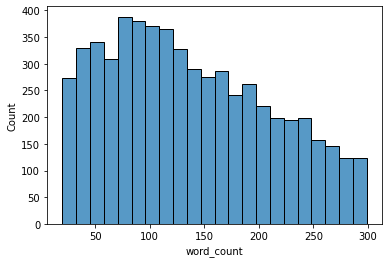

In [130]:
sns.histplot(data=dataset[dataset['word_count'] < 300], x='word_count');

## Ngram Analysis

In [121]:
dataset.to_csv('../data/clean_dataset.csv', index=False)